## Welcome to the data mining portion of the course

- This section of the course moves away from studying free text and will instead focus on more sturctured data analysis. 
- From now on the notebooks will use a language called R which was specifically created for data analytics. 
- Like the previous sections the code is being provided for your reference and it is not necessary to understand the specifics in order to progress through the remainder of the course. 

### In this notebook we will be covering 

1. How to read in a CSV file from github 
2. How to select variable columns from a data frame 
3. How to change data types
4. Replacing null numeric cells with the column mean
5. Replacing null categorical cells with a zero 
6. Replacing null cells using random forest imputation

## How to run this module 

Throughout this module you will encounter both text and code cells. Please run each cell in this Notebook by clicking "Run" button in the Toolbar or by pushing Shift+Enter keys
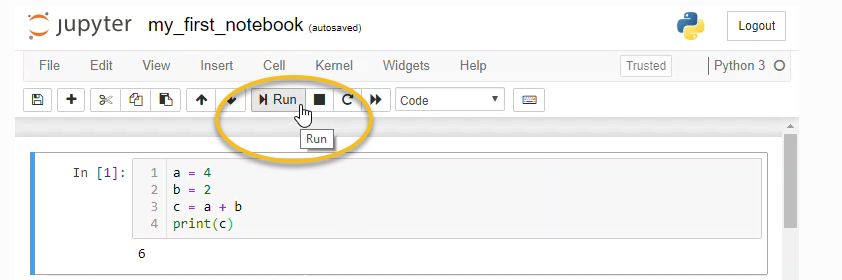

The cell above is an example of a code cell. You will be running numerous code cells like the one below throughout the case. Select the cell and select the run button above. 

In [ ]:
# This is an example of a code cell
print('Congratulations!')
print('You\'ve run your first code cell.')

## Please click the image below to open the video lecture for this module 

[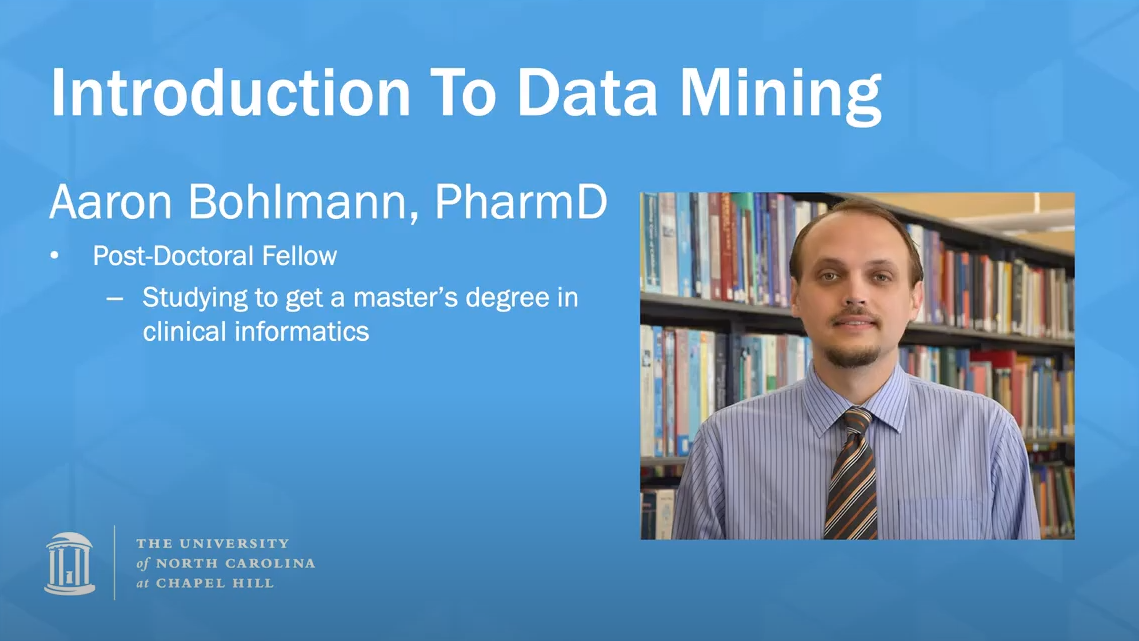](https://edpuzzle.com/embed/media/5ee115b175623c3f3549c680 "Preparing Data")

## Read in the CSV file

- The first step in many data mining projects is to read a data set into the data analytics software. 
- In this lesson we are loading an intensive care unit (ICU) CSV file into R. 
- In future lessons we will be using this data set and machine learning algorithms to predict hospital death in the ICU. 

In [ ]:
#install and load packages required to read in the CSV file 
library (readr)
library (rlang)


#location of raw csv file on github repository 
urlfile="https://raw.githubusercontent.com/e-cui/ENABLE-HiDAV-Online-Modules/master/Data%20Mining%20Modules/csv_files/training_v2.csv"

#Read the CSV file into a data frame called training_v2 
training_v2<-read_csv(url(urlfile))

#print
print("CSV file loaded successfully")

## Selecting variable columns from a data frame

- In this section we are reducing the number of columns to a more managable number to allow for easier data manipulation.
- Most of the variables selected in this step were chosen because they are part of the Apache algorithm which was developed to predict patient death in the ICU. 
- Some variables from the orginal Apache algorithm are being excluded due to missing information. 
- We have also selected some new variables to see if we can improve the performance of our model. 

In [ ]:
#select variable columns from the training_v2 data frame into a new data frame called practice_csv
library(dplyr)
practice_csv = select(training_v2, 4, 43, 36, 79, 61, 42, 123, 107, 115, 46, 28, 29, 5, 16, 6, 35, 20)
 
#create sepsis and cardiovascular diagnosis columns from the diagnosis column
practice_csv<- mutate(practice_csv, sepsis = ifelse(apache_2_diagnosis == '113', '1', '0'))
practice_csv<- mutate(practice_csv, cardiovascular_diagnosis = ifelse(apache_2_diagnosis == '114', '1', '0'))

#delete original diagnosis column
practice_csv = select(practice_csv, -17)

#print
print("variables selected, sepsis and cardiovascular diagnosis columns added, diagnosis column deleted")

## Changing data types of the selected variables 

- Before replacing nulls values with a measure of center the correct data type must be assigned to each column in our data frame. 
- Numeric columns can have a mean, a median, and a mode. 
- Ordinal columns can have a median and a mode. 
- Categorical columns only have a mode. 

In [ ]:
#change categorical variables to factor data type 
practice_csv$hospital_death<- as.factor(practice_csv$hospital_death)
practice_csv$sepsis<- as.factor(practice_csv$sepsis)
practice_csv$cardiovascular_diagnosis<- as.factor(practice_csv$cardiovascular_diagnosis)
practice_csv$intubated_apache<- as.factor(practice_csv$intubated_apache)
practice_csv$gcs_eyes_apache<- as.factor(practice_csv$gcs_eyes_apache)
practice_csv$gcs_motor_apache<- as.factor(practice_csv$gcs_motor_apache)

#change to numeric variables to numeric data type 
practice_csv$temp_apache<- as.numeric(practice_csv$temp_apache)
practice_csv$map_apache<- as.numeric(practice_csv$map_apache)
practice_csv$h1_heartrate_max<- as.numeric(practice_csv$h1_heartrate_max)
practice_csv$d1_resprate_max<- as.numeric(practice_csv$d1_resprate_max)
practice_csv$d1_potassium_max<- as.numeric(practice_csv$d1_potassium_max)
practice_csv$d1_creatinine_max<- as.numeric(practice_csv$d1_creatinine_max)
practice_csv$d1_hematocrit_max<- as.numeric(practice_csv$d1_hematocrit_max)
practice_csv$sodium_apache<- as.numeric(practice_csv$sodium_apache)
practice_csv$wbc_apache<- as.numeric(practice_csv$wbc_apache)
practice_csv$age<- as.numeric(practice_csv$age)
practice_csv$pre_icu_los_days<- as.numeric(practice_csv$pre_icu_los_days)
practice_csv$bmi<- as.numeric(practice_csv$bmi)

#check all variable data types to make sure they are correct
str(practice_csv)

## Replacing null values using measures of center (mean, median, mode)  

- When replacing a null value with a measure of center it is important to consider the distribution of the data. 
- When numeric data is evenly distributed the mean is the best measure of center but if the data is skewed then the median is a better choice. 

In [ ]:
#replace some numeric variable nulls with the column mean 
practice_csv = transform(practice_csv, bmi = ifelse(is.na(bmi), mean(bmi, na.rm=TRUE), bmi))
practice_csv = transform(practice_csv, temp_apache = ifelse(is.na(temp_apache), mean(temp_apache, na.rm=TRUE), temp_apache))
practice_csv = transform(practice_csv, map_apache = ifelse(is.na(map_apache), mean(map_apache, na.rm=TRUE), map_apache))
practice_csv = transform(practice_csv, h1_heartrate_max = ifelse(is.na(h1_heartrate_max), mean(h1_heartrate_max, na.rm=TRUE), h1_heartrate_max))
practice_csv = transform(practice_csv, d1_resprate_max = ifelse(is.na(d1_resprate_max), mean(d1_resprate_max, na.rm=TRUE), d1_resprate_max))
practice_csv = transform(practice_csv, d1_potassium_max = ifelse(is.na(d1_potassium_max), mean(d1_potassium_max, na.rm=TRUE), d1_potassium_max))
practice_csv = transform(practice_csv, d1_creatinine_max = ifelse(is.na(d1_creatinine_max), mean(d1_creatinine_max, na.rm=TRUE), d1_creatinine_max))
practice_csv = transform(practice_csv, d1_hematocrit_max = ifelse(is.na(d1_hematocrit_max), mean(d1_hematocrit_max, na.rm=TRUE), d1_hematocrit_max))
practice_csv = transform(practice_csv, sodium_apache = ifelse(is.na(sodium_apache), mean(sodium_apache, na.rm=TRUE), sodium_apache))
practice_csv = transform(practice_csv, wbc_apache = ifelse(is.na(wbc_apache), mean(wbc_apache, na.rm=TRUE), wbc_apache))
practice_csv = transform(practice_csv, pre_icu_los_days = ifelse(is.na(pre_icu_los_days), mean(pre_icu_los_days, na.rm=TRUE), pre_icu_los_days))
practice_csv = transform(practice_csv, age = ifelse(is.na(age), mean(age, na.rm=TRUE), age))


#replace some categorical variable nulls with 0 (0 is the mode for these columns)
#gcs_motor_apache nulls replaced with a 1 (1 is the mode for this column) 
practice_csv$sepsis[is.na(practice_csv$sepsis)] <- 0
practice_csv$cardiovascular_diagnosis[is.na(practice_csv$cardiovascular_diagnosis)] <- 0
practice_csv$gcs_motor_apache[is.na(practice_csv$gcs_motor_apache)] <- 1
practice_csv$gcs_eyes_apache[is.na(practice_csv$gcs_eyes_apache)] <- 1

#print
print("Numeric nulls replaced with column mean, categorical nulls replaced with 0 or 1")

## Replacing null values using a random forest algorithm 

- This algorithm makes multiple decision trees that are used to predict the missing information in our data set. 
- One advantage of using random forest for imputation (replacement of missing data) is that is works for both numeric and categorical data types.

In [ ]:
#use a random forest algorithm to replace the remaining nulls
#random forest imputation works for replacing both categorical and numeric variables
#ntree is the number of trees, maxiter is the maximum number of iterations (repeats) 
#more trees and more iterations can increase accuracy but takes more time to run
library(missForest)
library(randomForest)
set.seed(96) 
practice_csv.imp <- missForest(practice_csv, verbose = TRUE, maxiter = 2, ntree = 10)

#check imputed values
practice_csv.imp$ximp

#assign imputed data frame to a new data frame called t
t<- practice_csv.imp$ximp

## This concludes our introduction to data analytics 

- The following questions were addressed between this notebook and the complementary video lecture:
1. What is a CSV file and how is it loaded into R? 
2. What are some simple and more advanced methods that can be used to deal with nulls? 
3. How should improbable data be handled?   

## (Informational Only) Exporting a CSV file 

- This section was provided to give an example of how R code can be used to export a CSV file to a specific file location. 

In [ ]:
#this code writes a CSV file of the dataframe to a specified file path location 
write.csv(dataframe,"file_path", row.names = FALSE)